# 数字图像处理第六次作业

赵子瑞　自动化钱61　2160405068

## 摘要

本次作业主要包括图像噪声，利用空间滤波的图像恢复和重建，维纳滤波的推导和性质讨论。实验中，通过python实现了高斯噪声和椒盐噪声，通过自行实现均值滤波器、统计排序滤波器，以及自适应滤波器，分别对不同噪声进行图像恢复和重建。
通过本次实验，我掌握了很多珍贵的知识。

## Assignments 

本次实验的任务为一下几个部分
* 在测试图像上产生高斯噪声lena图-需能指定均值和方差；并用多种滤波器恢复图像，分析各自优缺点；
* 在测试图像lena图加入椒盐噪声（椒和盐噪声密度均是0.1）；用学过的滤波器恢复图像；在使用反谐波分析Q大于0和小于0的作用；
* 推导维纳滤波器并实现下边要求:

    * 实现模糊滤波器如方程Eq. (5.6-11).
    * 模糊lena图像：45度方向，T=1；
    * 再模糊的lena图像中增加高斯噪声，均值= 0 ，方差=10 pixels 以产生模糊图像；
    * 分别利用方程 Eq. (5.8-6)和(5.9-4)，恢复图像；并分析算法的优缺点.

## Task1

首先在lena图片上实现高斯噪声，我们通过不同的均值和方差，来实现对图像的噪声控制。

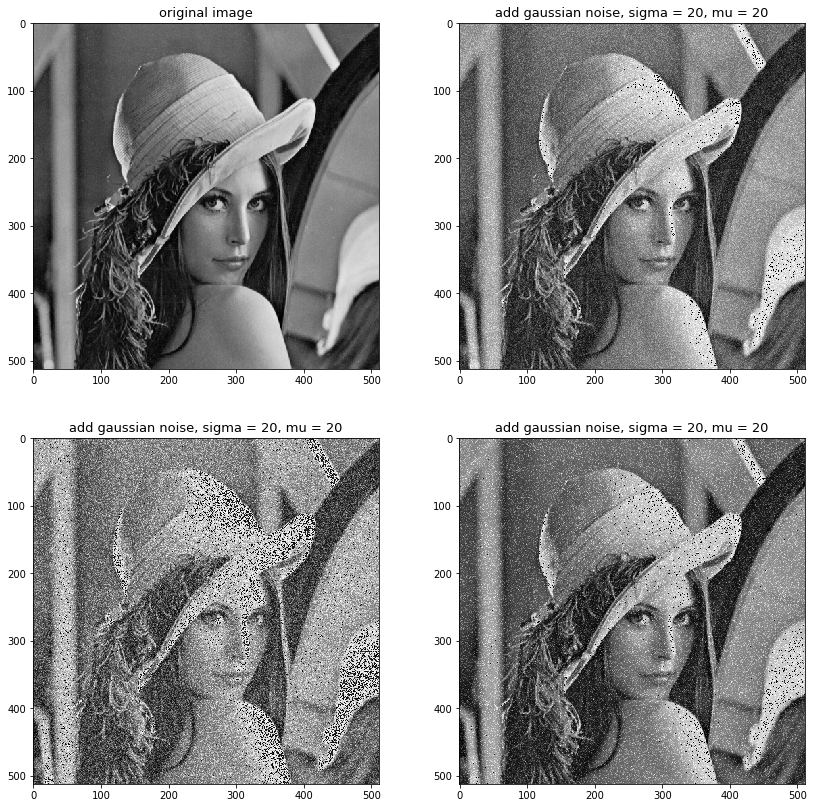

In [2]:
import sys
import os
lib_path = os.path.abspath(os.path.join(sys.path[0], '..'))
sys.path.append(lib_path)
from src.basic_cv_tool import *

image_name = '../../homework6/project6/lena.bmp'

tool = basic_cv_tool(image_name)
img = tool.ImageRead(image_name)
img1 = tool.Gaussian_Noise_generator(img.copy(), 20, 20, 1)
img2 = tool.Gaussian_Noise_generator(img.copy(), 40, 40, 1)
img3 = tool.Gaussian_Noise_generator(img.copy(), 40, 0, 1)
plt.figure(figsize = (14,14))
p = plt.subplot(221)
p.set_title('original image', fontsize = 13)
p.imshow(img,cmap = 'gray')
p1 = plt.subplot(222)
p1.set_title('add gaussian noise, sigma = 20, mu = 20', fontsize = 13)
p1.imshow(img1,cmap='gray')
p2 = plt.subplot(223)
p2.set_title('add gaussian noise, sigma = 20, mu = 20', fontsize = 13)
p2.imshow(img2,cmap='gray')
p3 = plt.subplot(224)
p3.set_title('add gaussian noise, sigma = 20, mu = 20', fontsize = 13)
p3.imshow(img3,cmap='gray')

我们设计了多种多样的滤波器，通过相应的滤波器，可以得到不同的滤波效果。

### Mean Filters

#### Arithmetic mean filter

这是最简单的均值滤波器。其公式如下。

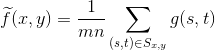

用算数均值滤波器处理一下有噪声的图片，效果如下。

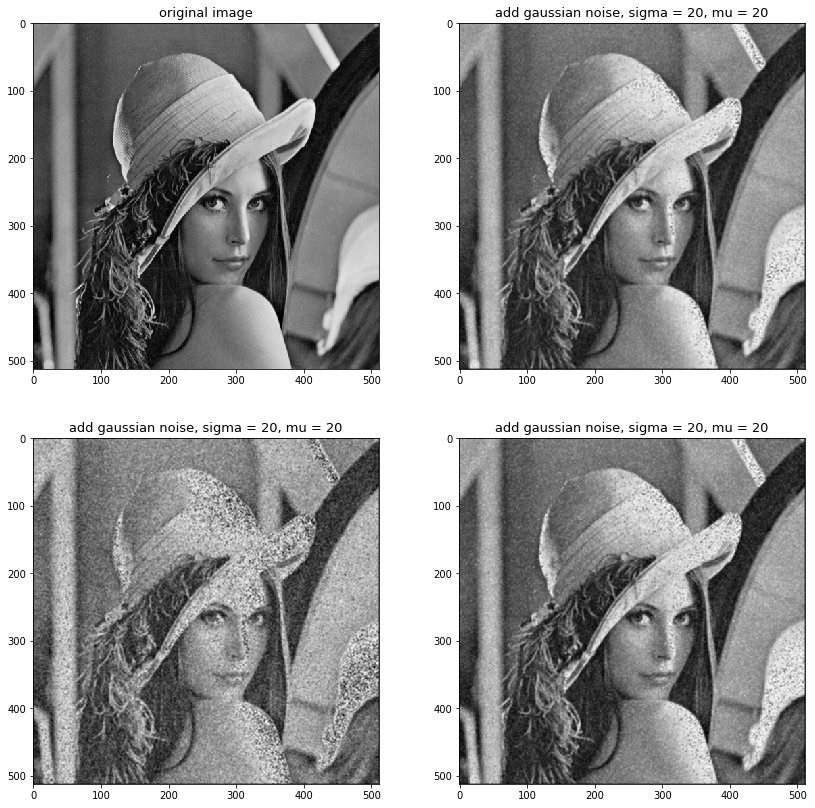

In [3]:
img4 = tool.meanFilter(img1, 3, 3)
img5 = tool.meanFilter(img2, 3, 3)
img6 = tool.meanFilter(img3, 3, 3)
plt.figure(figsize = (14,14))
p = plt.subplot(221)
p.set_title('original image', fontsize = 13)
p.imshow(img,cmap = 'gray')
p1 = plt.subplot(222)
p1.set_title('add gaussian noise, sigma = 20, mu = 20', fontsize = 13)
p1.imshow(img4,cmap='gray')
p2 = plt.subplot(223)
p2.set_title('add gaussian noise, sigma = 20, mu = 20', fontsize = 13)
p2.imshow(img5,cmap='gray')
p3 = plt.subplot(224)
p3.set_title('add gaussian noise, sigma = 20, mu = 20', fontsize = 13)
p3.imshow(img6,cmap='gray')

#### Geometric mean filter

几何均值滤波器，公式如下。

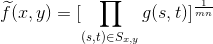

其处理效果如下

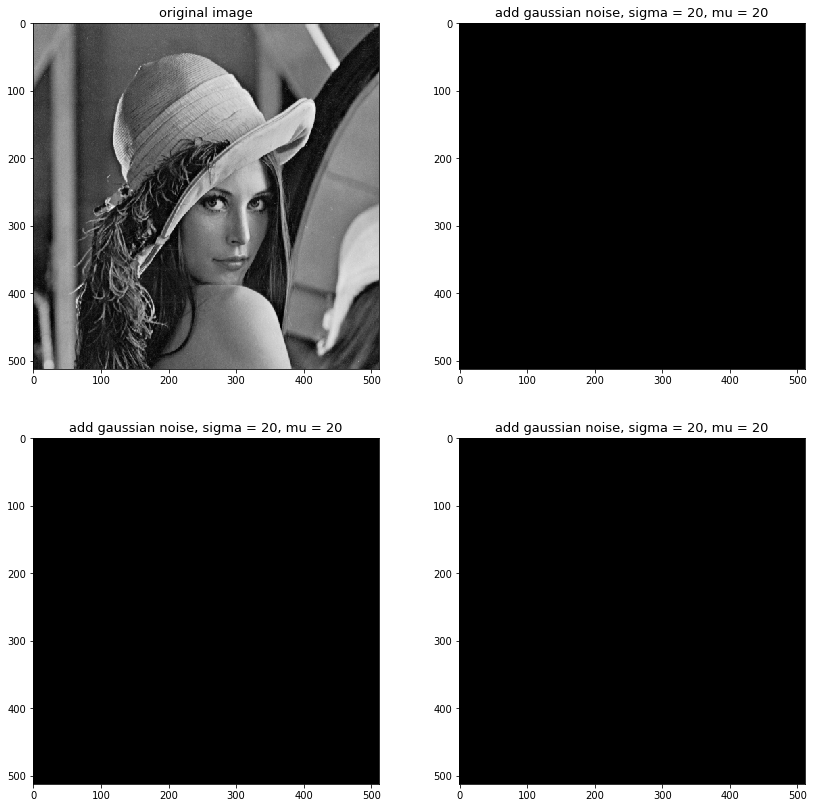

In [9]:
img7 = tool.geo_meanFilter(img1.copy(), 3, 3)
img8 = tool.geo_meanFilter(img2.copy(), 3, 3)
img9 = tool.geo_meanFilter(img3.copy(), 3, 3)
plt.figure(figsize = (14,14))
p = plt.subplot(221)
p.set_title('original image', fontsize = 13)
p.imshow(img,cmap = 'gray')
p1 = plt.subplot(222)
p1.set_title('add gaussian noise, sigma = 20, mu = 20', fontsize = 13)
p1.imshow(img7,cmap='gray')
p2 = plt.subplot(223)
p2.set_title('add gaussian noise, sigma = 20, mu = 20', fontsize = 13)
p2.imshow(img8,cmap='gray')
p3 = plt.subplot(224)
p3.set_title('add gaussian noise, sigma = 20, mu = 20', fontsize = 13)
p3.imshow(img9,cmap='gray')

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=uint8)

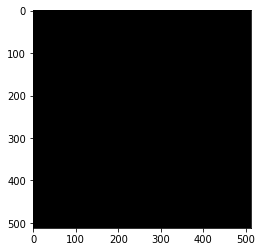

In [8]:
import sys
import os
lib_path = os.path.abspath(os.path.join(sys.path[0], '..'))
sys.path.append(lib_path)
from src.basic_cv_tool import *

image_name = '../../homework6/project6/lena.bmp'

tool = basic_cv_tool(image_name)
img = tool.ImageRead(image_name)
img1 = tool.Gaussian_Noise_generator(img.copy(), 20, 20, 1)
img2 = tool.Salt_and_Pepper_Noise_generator(img.copy(), 0.1)
img3 = tool.geo_meanFilter(img1.copy(),3,3)
img4 = tool.geo_meanFilter(img2.copy(),3,3)
plt.imshow(img3,cmap = 'gray')
cv2.imwrite("../../homework6/gausslena.bmp",img1)
cv2.imwrite("../../homework6/saltpepperlena.bmp",img2)
cv2.imwrite("../../homework6/meangausslena.bmp",img3)
cv2.imwrite("../../homework6/meansaltpepperlena.bmp",img4)
plt.imread("../../homework6/meansaltpepperlena.bmp")